In [19]:
%matplotlib inline
import keras
import matplotlib.pyplot as plt
import os
import sklearn
import numpy as np

In [2]:
from keras.preprocessing import image

### Split the Data into Directories to call ImageDataGenerator

In [18]:
# Cats_vs_Dogs
#|
#|___ train __
#|            |__ Cats
#|            |
#|            |__ Dogs
#|
#|
#|___ validate __
#                |__ Cats
#                |
#                |__ Dogs

In [3]:
data_directory = 'F:/Machine Learning/MLPrograms/Cats_Vs_Dogs'
subdirectories = ['/train/' , '/validate/']
for directory in subdirectories:
    classes = ['cats/' , 'dogs/']
    for c in classes:
        newdir = data_directory + directory + c
        os.makedirs(newdir , exist_ok = True)
print("Creation Done")

Creation Done


In [4]:
from random import seed , random
from shutil import copyfile

### Copy Source files into the Created Directories

##### Create train and validation datasets from the original training dataset

In [5]:
if (len(os.listdir(data_directory + '/validate/cats'))==0):
    
    seed(1)
    split_ratio = 0.25
    source = 'F:/Machine Learning/MLPrograms/Cats Vs Dogs/train/train'
    dirs = 'F:/Machine Learning/MLPrograms/Cats_Vs_Dogs'
    for file in os.listdir(source):
        sub = '/train'
        if random()<split_ratio:
            sub = '/validate'
        if file.startswith('cat'):
            destination = dirs + sub + '/cats/' + file
        else:
            desination = dirs + sub + '/dogs/' + file
        copyfile(source , destination)
    print("Split Done")
else:
    print("Directory already filled")
    
source = 'F:/Machine Learning/MLPrograms/Cats Vs Dogs/test/test'
destination = 'F:/Machine Learning/MLPrograms/Cats_Vs_Dogs/test'
for file in os.listdir(source):
    copyfile(source , destination)

Directory already filled


### Create ImageDataGenerators for training and validation datasets 

In [6]:
train_data_generator = image.ImageDataGenerator(rescale = 1.0/255.0 ,shear_range=0.2, zoom_range=0.2 , horizontal_flip = True , vertical_flip = True)
validation_data_generator = image.ImageDataGenerator(rescale = 1.0/255.0)

In [7]:
train = train_data_generator.flow_from_directory('F:/Machine Learning/MLPrograms/Cats_Vs_Dogs/train/' , class_mode = 'binary' , batch_size = 100 , target_size = (128,128))
validate = validation_data_generator.flow_from_directory('F:/Machine Learning/MLPrograms/Cats_Vs_Dogs/validate/' , class_mode = 'binary' , batch_size = 2 , target_size = (128,128))

Found 24500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### Define the model

In [8]:
from keras.models import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , Dropout

In [9]:
model = Sequential()
input_shape = (128,128,3)

model.add(Conv2D(32 , kernel_size = (3,3) , strides = (1,1) , activation = 'relu' , kernel_initializer = 'he_uniform' , input_shape = input_shape))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))

model.add(Conv2D(32 , kernel_size = (3,3) , strides = (1,1) , activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64 , kernel_size = (3,3) , strides = (1,1) , activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(100 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1 , activation = 'sigmoid'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
dropout_2 (Dropout)          (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
________________________________________________

### Compile and Fit the model 
##### Optimizer : RMSprop  
##### Loss Criterion : binary_crossentropy

In [10]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [12]:
history = model.fit_generator(train ,validation_data = validate , epochs = 5 , verbose = 1)

Epoch 1/5
245/245 [==============================] - 577s 2s/step - loss: 0.5708 - accuracy: 0.7060 - val_loss: 0.5745 - val_accuracy: 0.7740
Epoch 2/5
245/245 [==============================] - 577s 2s/step - loss: 0.5521 - accuracy: 0.7241 - val_loss: 0.8731 - val_accuracy: 0.7540
Epoch 3/5
245/245 [==============================] - 579s 2s/step - loss: 0.5373 - accuracy: 0.7367 - val_loss: 0.3808 - val_accuracy: 0.7820
Epoch 4/5
245/245 [==============================] - 578s 2s/step - loss: 0.5234 - accuracy: 0.7451 - val_loss: 0.3182 - val_accuracy: 0.8220
Epoch 5/5
245/245 [==============================] - 577s 2s/step - loss: 0.5115 - accuracy: 0.7533 - val_loss: 0.4321 - val_accuracy: 0.8140


### Evaluate the Accuracy Metric

In [13]:
_ , accuracy = model.evaluate_generator(validate  , verbose = 1)
print('accuracy = ' , accuracy*100 , '%')

250/250 [==============================] - 3s 11ms/step
> 81.400


### Plot Loss and Accuracy for training and validation datasets 

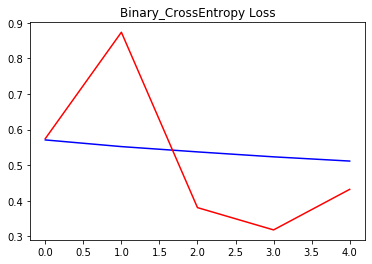

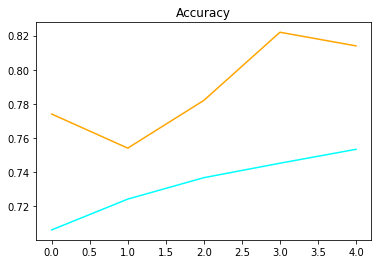

In [17]:

plt.title("Binary_CrossEntropy Loss")
plt.plot(history.history['loss'] , color = 'blue' , label = 'training loss')
plt.plot(history.history['val_loss'] , color = 'red' , label = 'validation loss')

plt.show()

plt.title("Accuracy")
plt.plot(history.history['accuracy'] , color = 'cyan' , label = 'training accuracy')
plt.plot(history.history['val_accuracy'] , color = 'orange' , label = 'validation accuracy')

plt.show()

### Save the weights to a hdf5 file

In [ ]:
model.save_weights('CvD_keras_weights.h5')

### Save the model to a JSON file

In [ ]:
from keras.models import model_from_json

In [ ]:
model_json = model.to_json()
with open("CvD_keras_model.json", "w") as json_file:
    json_file.write(model_json)

### Check Prediction.ipynb for Model Predictions